Task1

In [1]:
# Sample study time data
time_data = [2, 4, 1, 6, 5, 3, 7]

# Empty lists for classifications
low_study = []        # < 3 hours
moderate_study = []   # 3 to 5 hours
high_study = []       # > 5 hours

# Classify study hours
for study_hours in time_data:
    if study_hours < 3:
        low_study.append(study_hours)
    elif 3 <= study_hours <= 5:
        moderate_study.append(study_hours)
    else:
        high_study.append(study_hours)

# Print results
print("Low study days:", low_study)
print("Moderate study days:", moderate_study)
print("High study days:", high_study)

Low study days: [2, 1]
Moderate study days: [4, 5, 3]
High study days: [6, 7]


Task2

In [2]:
# Sample study time data
time_data = [2, 4, 1, 6, 5, 3, 7]

# Count days in each category using list comprehensions
low_days = len([h for h in time_data if h < 3])
moderate_days = len([h for h in time_data if 3 <= h <= 5])
high_days = len([h for h in time_data if h > 5])

# Print results
print("Low study time (<3 hours):", low_days)
print("Moderate study time (3-5 hours):", moderate_days)
print("High study time (>5 hours):", high_days)

Low study time (<3 hours): 2
Moderate study time (3-5 hours): 3
High study time (>5 hours): 2


Task3

In [3]:
time_data = [2, 4, 1, 6, 5, 3, 7]
study_minutes = [hours * 60 for hours in time_data]
print("Study time in minutes:", study_minutes)

Study time in minutes: [120, 240, 60, 360, 300, 180, 420]


Task4

In [4]:
time_data = [
    [2, 3, 8],
    [4, 2, 7],
    [1, 4, 6],
    [6, 1, 7],
    [5, 2, 8],
    [3, 3, 7],
    [7, 1, 6]
]

study_hours = []
entertainment_hours = []
sleep_hours = []
for record in time_data:
    study_hours.append(record[0])
    entertainment_hours.append(record[1])
    sleep_hours.append(record[2])
average_study = sum(study_hours) / len(study_hours)
average_entertainment = sum(entertainment_hours) / len(entertainment_hours)
average_sleep = sum(sleep_hours) / len(sleep_hours)
print(f"Average hours spent studying: {average_study:.2f}")
print(f"Average hours spent on entertainment: {average_entertainment:.2f}")
print(f"Average hours spent sleeping: {average_sleep:.2f}")

Average hours spent studying: 4.00
Average hours spent on entertainment: 2.29
Average hours spent sleeping: 7.00


Task5

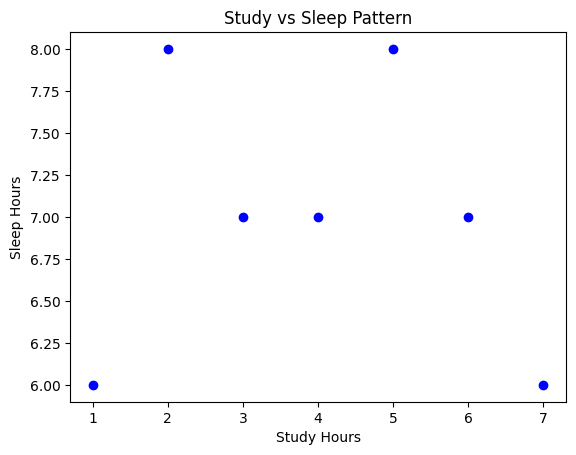

In [5]:
import matplotlib.pyplot as plt
time_data = [
    [2, 3, 8],
    [4, 2, 7],
    [1, 4, 6],
    [6, 1, 7],
    [5, 2, 8],
    [3, 3, 7],
    [7, 1, 6]
]
study_hours = [record[0] for record in time_data]
sleep_hours = [record[2] for record in time_data]
plt.scatter(study_hours, sleep_hours, color='blue')
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.show()


Recursion
Task1

In [6]:
def sum_nested_list(nested_list):
    """
    Recursively sums all numbers inside a nested list.
    """
    total = 0
    for element in nested_list:
        if isinstance(element, list):
            total += sum_nested_list(element)
        else:
            total += element
    return total


# Test
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print("Sum:", sum_nested_list(nested_list))

Sum: 36


Task2

In [7]:
def generate_permutations(s):
    if len(s) <= 1:
        return [s]

    permutations = []
    used = set()

    for i in range(len(s)):
        char = s[i]
        if char in used:
            continue
        used.add(char)

        remaining = s[:i] + s[i+1:]
        for perm in generate_permutations(remaining):
            permutations.append(char + perm)

    return permutations

print(generate_permutations("abc"))
print(generate_permutations("aab"))

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


Task3

In [8]:
def calculate_directory_size(directory):
    """
    Recursively calculates total size of a directory represented as nested dictionaries.
    """
    total_size = 0

    for key, value in directory.items():
        if isinstance(value, dict):
            total_size += calculate_directory_size(value)
        else:
            total_size += value

    return total_size


# Test
directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

print("Total directoryize (KB):", calculate_directory_size(directory_structure))

Total directoryize (KB): 1400


8.2 Dyanamic programming

Task1

In [9]:
def min_coins(coins, amount):
    """
    Uses DP (tabulation) to find minimum number of coins to make 'amount'.
    Returns -1 if impossible.
    """
    dp = [float("inf")] * (amount + 1)
    dp[0] = 0

    for coin in coins:
        for a in range(coin, amount + 1):
            dp[a] = min(dp[a], dp[a - coin] + 1)

    return dp[amount] if dp[amount] != float("inf") else -1


print(min_coins([1, 2, 5], 11))

3


Task2

In [10]:
def longest_common_subsequence(s1, s2):

    n, m = len(s1), len(s2)

    dp = [[0]*(m+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for j in range(1, m+1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[n][m]


print(longest_common_subsequence("abcde", "ace"))

3


Task3

In [11]:
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0]*(capacity+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for cap in range(capacity+1):
            if weights[i-1] <= cap:
                dp[i][cap] = max(
                    dp[i-1][cap],
                    dp[i-1][cap - weights[i-1]] + values[i-1]
                )
            else:
                dp[i][cap] = dp[i-1][cap]

    return dp[n][capacity]


# Test
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7

print(knapsack(weights, values, capacity))

9
